#Import TVB modules

In [2]:
%pylab nbagg
from tvb.simulator.lab import *

Populating the interactive namespace from numpy and matplotlib
   INFO  log level set to INFO


#Simulate seizure
Create model with default parameters from tutorial. Use EEG, sEEG and temporal averages.

In [3]:
epileptors = models.Epileptor(Ks=-0.2, Kf=0.1, r=0.00015)
epileptors.x0 = np.ones((76))*-2.4 #-2.4 #set all brain regions non-epileptic
#epileptors.x0[[69, 72]] = np.ones((2))*-2.4 #-1.8 #overwrite as epileptogenic; borderline epileptic ('close to epilepsy threshold')
#epileptors.x0[[62, 47, 40]] = np.ones((3))*-1.6 #overwrite as epileptic neural populations
con = connectivity.Connectivity(load_default=True)
coupl = coupling.Difference(a=1.)
hiss = noise.Additive(nsig = numpy.array([0., 0., 0., 0.0003, 0.0003, 0.]))
heunint = integrators.HeunStochastic(dt=0.05, noise=hiss)
# load the default region mapping
rm = region_mapping.RegionMapping(load_default=True)

#Initialise some Monitors with period in physical time
mon_tavg = monitors.TemporalAverage(period=1.)

mon_SEEG = monitors.iEEG(load_default=True,
                         region_mapping=rm,
                         period=1.)

#Bundle them
what_to_watch = (mon_tavg, mon_SEEG)

#Initialise a Simulator -- Model, Connectivity, Integrator, and Monitors.
sim = simulator.Simulator(model=epileptors, connectivity=con,
                          coupling=coupl, 
                          integrator=heunint, monitors=what_to_watch)

sim.configure()



WARNING  File 'hemispheres' not found in ZIP.


Simulator(bound=False, value=None)

In [4]:
(ttavg, tavg), (tseeg, seeg) = sim.run(simulation_length=10000)


Normalize, plot

<IPython.core.display.Javascript object>


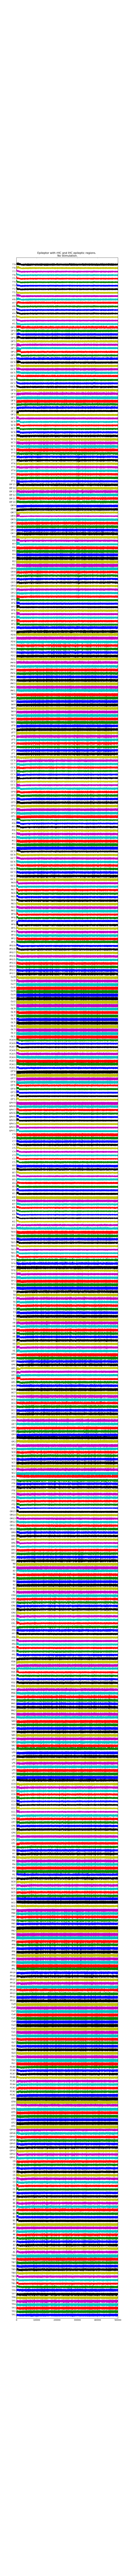

In [4]:
#Normalize SEEG data
seeg /= 5*(np.max(seeg,0) - np.min(seeg,0 ))
seeg -= np.mean(seeg, 0)

#SEEG has 588 traces
traces_displayed = 588
figure(figsize=(10,traces_displayed/3))



#Plot SEEG data
plot(tseeg[:], 10*seeg[:, 0, :traces_displayed, 0] + 2*np.r_[:traces_displayed])
yticks(2*np.r_[:traces_displayed], mon_SEEG.sensors.labels[:traces_displayed])
ylim([-2,traces_displayed*2 +2])
title("Epileptor with rHC and lHC epileptic regions. \n No Stimulation.")

In [1]:
# Normalize the time series to have nice plots
tavg /= (np.max(tavg,0) - np.min(tavg,0 ))

#Plot raw time series
figure(figsize=(30,15))
#plot(ttavg[:], tavg[:, 0, :, 0] + np.r_[:76], 'r')
plot(ttavg[:], tavg[:, 0, [9,47,2,40,0,38], 0] + [1,2,3,4,5,6], 'r')
yticks([1,2,3,4,5,6], con.region_labels[[9,47,2,40,0,38]])
title("No Stimulation, all nodes healthy (x0=-2.4)")

NameError: name 'tavg' is not defined

In [98]:
print len(tavg[1][0][0])



588
